# Analysing Time Series Model in Machine Learning

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr


# Stock Prices

In [2]:
stock_price = pdr.DataReader(['AAPL', 'EBAY', 'FB', 'GOOGL'], data_source='yahoo',start='2010-01-01', end='2020-11-20')
stock_price.head()

Attributes Adj Close                               Close                 \
Symbols         AAPL      EBAY  FB       GOOGL      AAPL       EBAY  FB   
Date                                                                      
2009-12-31  6.439648  9.647641 NaN  310.300293  7.526072   9.903198 NaN   
2010-01-04  6.539882  9.799347 NaN  313.688690  7.643214  10.058923 NaN   
2010-01-05  6.551187  9.696843 NaN  312.307312  7.656428   9.953704 NaN   
2010-01-06  6.446983  9.635342 NaN  304.434448  7.534643   9.890573 NaN   
2010-01-07  6.435065  9.524637 NaN  297.347351  7.520714   9.776936 NaN   

Attributes                  High             ... Low                  Open  \
Symbols          GOOGL      AAPL       EBAY  ...  FB       GOOGL      AAPL   
Date                                         ...                             
2009-12-31  310.300293  7.619643  10.101010  ... NaN  310.300293  7.611786   
2010-01-04  313.688690  7.660714  10.092592  ... NaN  312.432434  7.622500   
2010-01-05  312.307312  7.699643  10.058923  ... NaN  311.081085  7.664286   
2010-01-06  304.434448  7.686786  10.016835  ... NaN  303.483490  7.656428   
2010-01-07  297.347351  7.571429   9.886364  ... NaN  296.621613  7.562500   

Attributes                                  Volume                              
Symbols          EBAY  FB       GOOGL         AAPL        EBAY  FB       GOOGL  
Date                                                                            
2009-12-31  10.096802 NaN  312.687683  352410800.0  14233600.0 NaN   2437100.0  
2010-01-04   9.983165 NaN  313.788788  493729600.0  22511600.0 NaN   3908400.0  
2010-01-05  10.012627 NaN  313.903900  601904800.0  26683100.0 NaN   6003300.0  
2010-01-06   9.945286 NaN  313.243256  552160000.0  26368600.0 NaN   7949400.0  
2010-01-07   9.886364 NaN  305.005005  477131200.0  25220000.0 NaN  12815700.0  

[5 rows x 24 columns]

In [3]:
stock_price.drop(columns=[('Adj Close',  'AAPL'),
            ('Adj Close',  'EBAY'),
            ('Adj Close',    'FB'),
            ('Adj Close', 'GOOGL'),
            (     'High',  'AAPL'),
            (     'High',  'EBAY'),
            (     'High',    'FB'),
            (     'High', 'GOOGL'),
            (      'Low',  'AAPL'),
            (      'Low',  'EBAY'),
            (      'Low',    'FB'),
            (      'Low', 'GOOGL'),
            (     'Open',  'AAPL'),
            (     'Open',  'EBAY'),
            (     'Open',    'FB'),
            (     'Open', 'GOOGL'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'EBAY'),
            (   'Volume',    'FB'),
            (   'Volume', 'GOOGL')], inplace=True)

In [4]:
stock_price.describe()

Attributes        Close                                       
Symbols            AAPL         EBAY           FB        GOOGL
count       2743.000000  2743.000000  2143.000000  2743.000000
mean          32.868259    26.435416   122.241101   717.299134
std           22.941906    10.836403    66.361505   385.517339
min            6.858929     8.106061    17.730000   218.253250
25%           17.371607    20.090488    69.334999   339.104095
50%           26.807501    24.166666   119.870003   601.780029
75%           42.646252    34.895000   176.065002  1054.315002
max          134.179993    59.270000   303.910004  1774.030029

In [5]:
stock_price.corr()

Attributes             Close                              
Symbols                 AAPL      EBAY        FB     GOOGL
Attributes Symbols                                        
Close      AAPL     1.000000  0.879631  0.875202  0.911119
           EBAY     0.879631  1.000000  0.933063  0.938988
           FB       0.875202  0.933063  1.000000  0.977112
           GOOGL    0.911119  0.938988  0.977112  1.000000

In [6]:
stock_price.columns

MultiIndex([('Close',  'AAPL'),
            ('Close',  'EBAY'),
            ('Close',    'FB'),
            ('Close', 'GOOGL')],
           names=['Attributes', 'Symbols'])

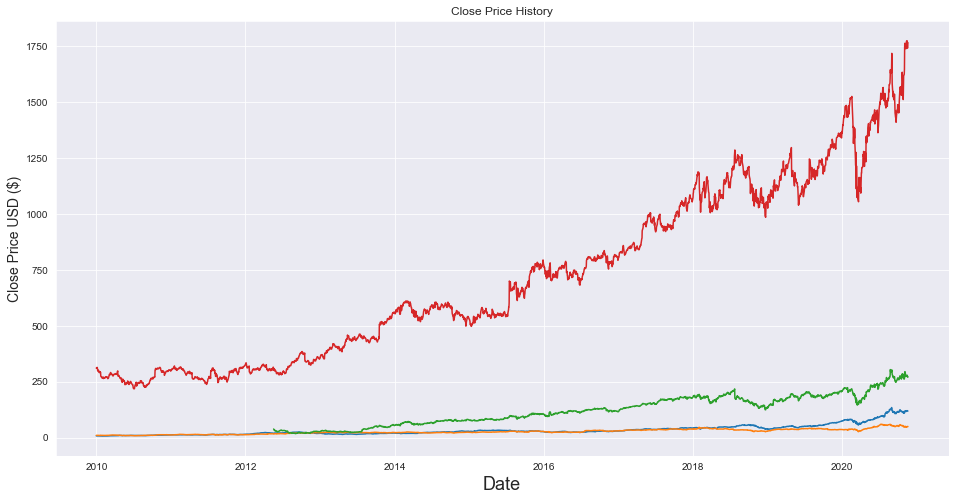

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(stock_price)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [22]:
stock_price.index.day_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20'],
              dtype='datetime64[ns]', name='Date', length=2743, freq=None)>

In [23]:
# Extract date features from the data, add them as columns
stock_price['day_of_week'] = stock_price.index.weekday
stock_price['week_of_year'] = stock_price.index.week
stock_price['month_of_year'] = stock_price.index.month


## Regression for Predicting data over time

In [33]:
stock_price.dropna(inplace=True)
stock_price

Attributes       Close                                     day_of_week  \
Symbols           AAPL       EBAY          FB        GOOGL               
Date                                                                     
2012-05-18   18.942142  16.144781   38.230000   300.500488           4   
2012-05-21   20.045713  16.628788   34.029999   307.362366           0   
2012-05-22   19.891787  16.506735   31.000000   300.700714           1   
2012-05-23   20.377142  16.700336   32.000000   305.035034           2   
2012-05-24   20.190001  16.691919   33.029999   302.132141           3   
...                ...        ...         ...          ...         ...   
2020-11-16  120.300003  48.549999  278.959991  1774.030029           0   
2020-11-17  119.389999  48.330002  275.000000  1761.660034           1   
2020-11-18  118.029999  48.529999  271.970001  1740.640015           2   
2020-11-19  118.639999  49.779999  272.940002  1758.569946           3   
2020-11-20  118.529999  49.345001  270.399994  1765.569946           4   

Attributes week_of_year month_of_year  
Symbols                                
Date                                   
2012-05-18           20             5  
2012-05-21           21             5  
2012-05-22           21             5  
2012-05-23           21             5  
2012-05-24           21             5  
...                 ...           ...  
2020-11-16           47            11  
2020-11-17           47            11  
2020-11-18           47            11  
2020-11-19           47            11  
2020-11-20           47            11  

[2143 rows x 7 columns]

In [38]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import math

In [43]:
data = stock_price[[('Close',  'AAPL'), ('Close',  'EBAY'), ('Close',    'FB'), ('Close', 'GOOGL')]].values


In [42]:
data.shape

(2143, 4)